In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import textwrap


In [2]:
legend_dict = {"llm_direct_selection": "Approach2: Direct Select Frontiers",
               "llm_pos_neg_cot": "Approach1: Positive-Negative Reasoning",
               "fbe_baseline": "Frontier Based Exploration",
               "llm_pos_cot": "Approach1: Positive Reasoning",
               "l3mvn_baseline": "L3MVN",
               "llm_pos_no_cot": "Approach1: Positive Reasoning (without Chain of Thought)",
               "sem_exp_baseline": "SemExp",
               }

In [3]:
# Load the CSV data
csv_file_path = 'success_spl_per_category.csv'
df = pd.read_csv(csv_file_path)

In [4]:
# df.columns

In [5]:
# print(df)

/var/folders/hj/3fjyhjt93m7c5t7sztk1h8200000gn/T/ipykernel_82905/839528183.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pivot = pd.pivot_table(df, index='Category', columns='Experiment', values=['Success', 'SPL'], fill_value=0).stack(level=0).reset_index()


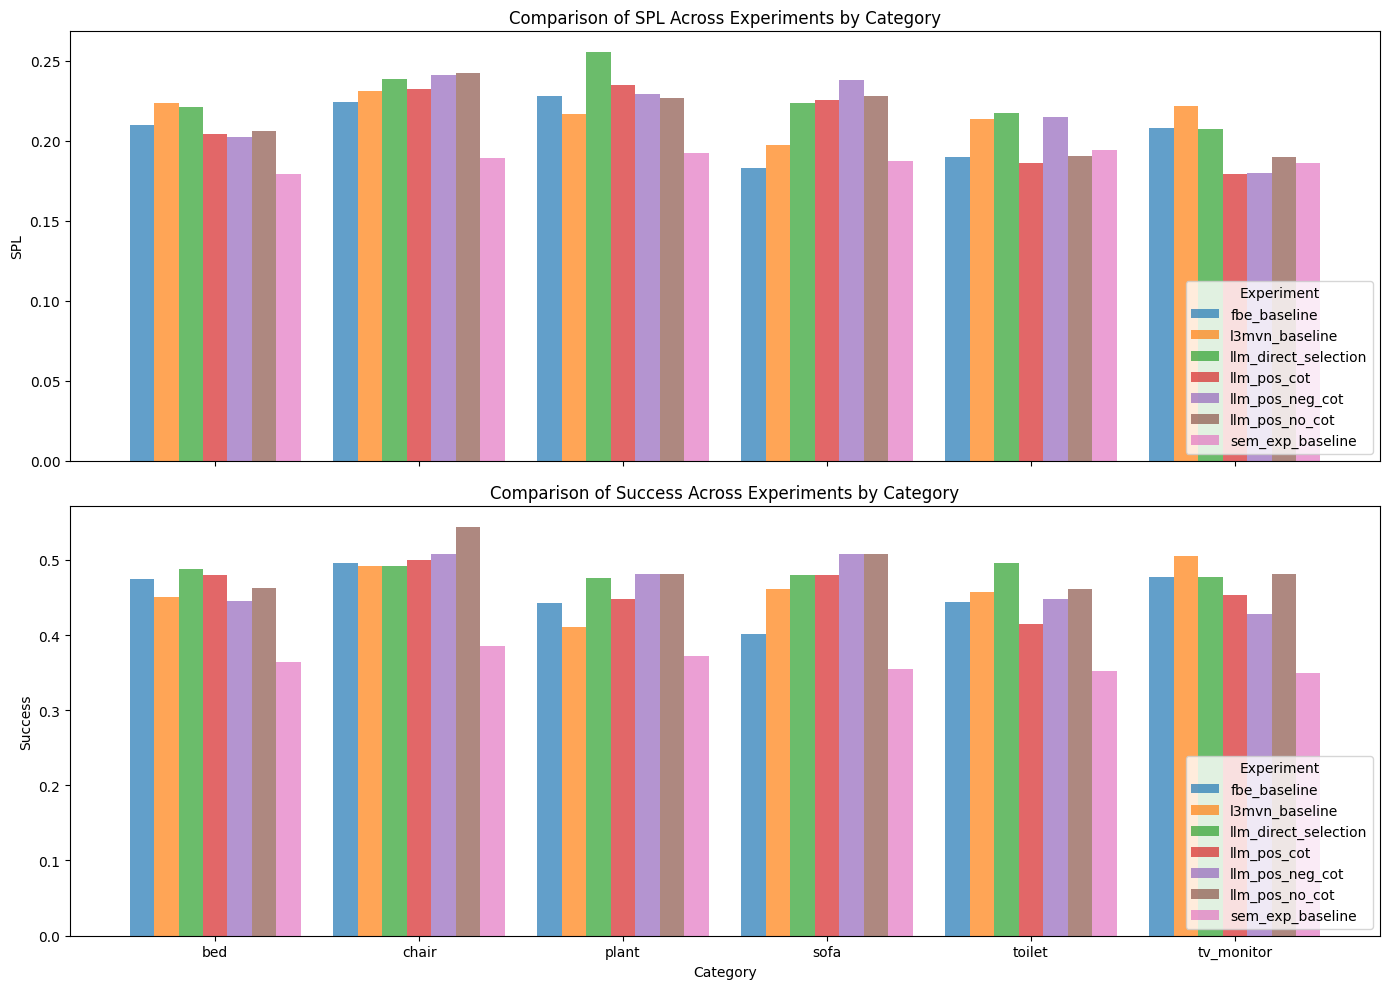

In [6]:
# Assuming the pivot table has been created as follows:
pivot = pd.pivot_table(df, index='Category', columns='Experiment', values=['Success', 'SPL'], fill_value=0).stack(level=0).reset_index()

# Extract the list of metrics (Success, SPL) and categories
metrics = pivot['level_1'].unique()
categories = pivot['Category'].unique()

# Adjust to extract the correct experiments from the pivot table columns
experiments = [col for col in pivot.columns if col not in ['Category', 'level_1', 'value']]

# Setup the figure for plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)
bar_width = 0.12  # Adjust width as needed

# Plot both Success and SPL
for ax, metric in zip(axes, metrics):
    for i, experiment in enumerate(experiments):
        # Filter for the current metric and experiment
        data = pivot[(pivot['level_1'] == metric)][experiment].values

        # Calculate bar positions
        positions = np.arange(len(categories)) + i * bar_width

        # Plot data
        ax.bar(positions, data, width=bar_width, label=experiment, alpha=0.7)

    # Set the x-axis labels and other properties
    ax.set_xticks(np.arange(len(categories)) + bar_width * (len(experiments) - 1) / 2)
    ax.set_xticklabels(categories, rotation=0)
    ax.set_ylabel(metric)
    ax.legend(title='Experiment', loc='lower right')
    ax.set_title(f'Comparison of {metric} Across Experiments by Category')

plt.xlabel('Category')
plt.tight_layout()
plt.show()

In [7]:
# Load the CSV data
csv_file_path = 'success_spl_per_category.csv'
df = pd.read_csv(csv_file_path)

/var/folders/hj/3fjyhjt93m7c5t7sztk1h8200000gn/T/ipykernel_82905/2817262199.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pivot = pd.pivot_table(df, index='Category', columns='Experiment', values=['Success', 'SPL'], fill_value=0).stack(level=0).reset_index()


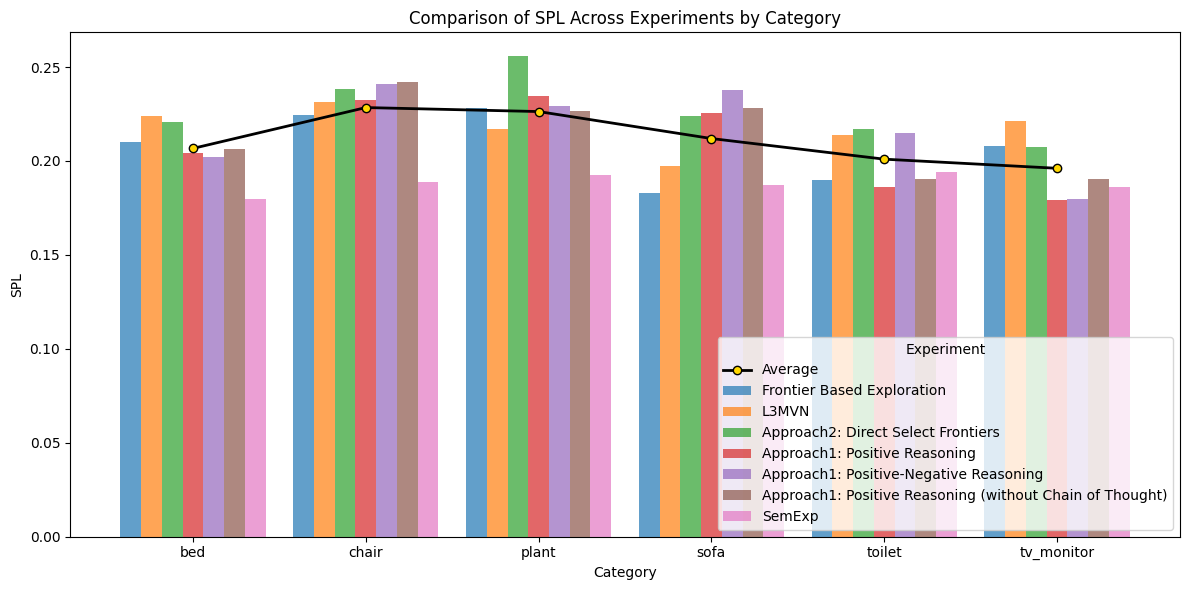

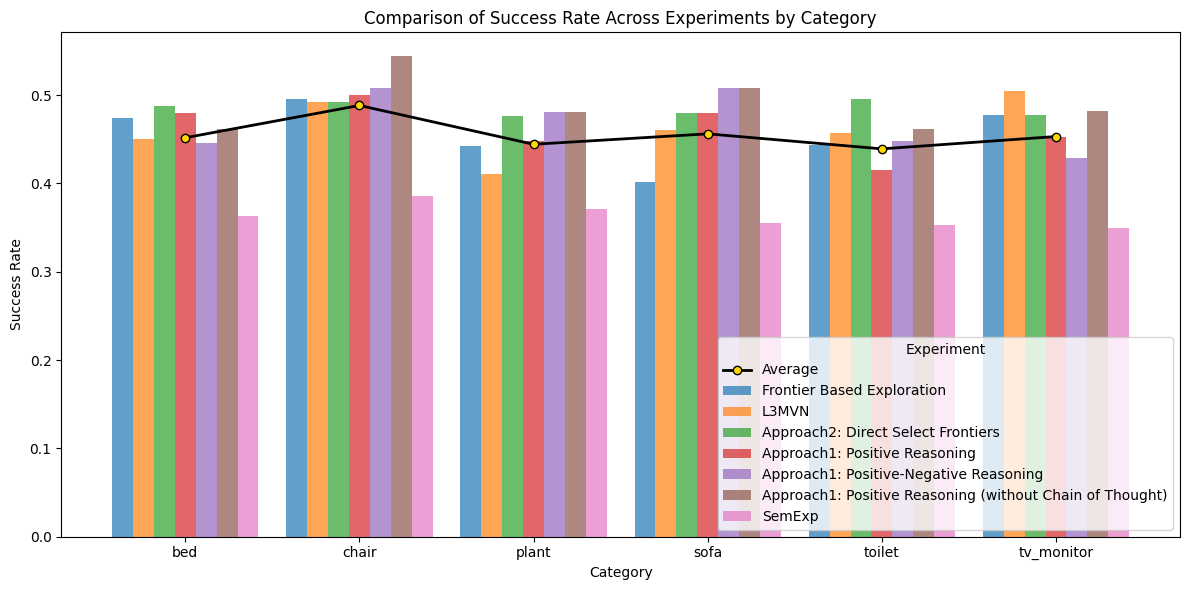

In [8]:
# Create a pivot table using pd.pivot_table
pivot = pd.pivot_table(df, index='Category', columns='Experiment', values=['Success', 'SPL'], fill_value=0).stack(level=0).reset_index()

metric_dict = {'Success': 'Success Rate', 'SPL': 'SPL'}
# Extract unique metrics (Success, SPL) and categories
metrics = pivot['level_1'].unique()
categories = pivot['Category'].unique()

# Extract experiment names directly from the columns, excluding 'Category' and 'level_1'
experiment_columns = pivot.columns[2:]

# Set bar width for the bar plots
bar_width = 0.12  # Adjust width as needed

# Loop through each metric to create individual figures
for metric in metrics:
    fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the height as needed

    for i, experiment in enumerate(experiment_columns):
        # Filter data for the current metric and experiment
        data = pivot[(pivot['level_1'] == metric)][experiment].values

        # Calculate bar positions
        positions = np.arange(len(categories)) + i * bar_width

        # Get the descriptive label from the legend_dict, fallback to the experiment name if not present
        label = legend_dict.get(experiment, experiment)

        # Plot bar chart
        ax.bar(positions, data, width=bar_width, label=label, alpha=0.7)

    # Calculate average values across experiments for each category
    average_values = pivot[pivot['level_1'] == metric][experiment_columns].mean(axis=1)

    # Calculate average positions for the line plot
    average_positions = np.arange(len(categories)) + (len(experiment_columns) - 1) * bar_width / 2

    # Plot the average line
    ax.plot(average_positions, average_values, 'k-o', label='Average', linewidth=2, markerfacecolor='gold')

    # Set the x-axis labels and other properties
    ax.set_xticks(np.arange(len(categories)) + bar_width * (len(experiment_columns) - 1) / 2)
    ax.set_xticklabels(categories)
    ax.set_ylabel(metric_dict[metric])
    ax.legend(title='Experiment', loc='lower right')
    ax.set_title(f'Comparison of {metric_dict[metric]} Across Experiments by Category')

    plt.xlabel('Category')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [9]:
# Replace experiment names in the DataFrame according to the legend_dict
df['Experiment'] = df['Experiment'].map(legend_dict).fillna(df['Experiment'])

# Function to escape LaTeX special characters in strings
def escape_latex(s):
    return s.replace('%', '\\%').replace('_', '\\_').replace('&', '\\&').replace('#', '\\#').replace('$', '\\$')

# Apply escape function to Category and Experiment columns
df['Category'] = df['Category'].apply(escape_latex)

# Pivot tables for 'Success' and 'SPL'
success_pivot = df.pivot_table(index='Category', columns='Experiment', values='Success', fill_value=0)
spl_pivot = df.pivot_table(index='Category', columns='Experiment', values='SPL', fill_value=0)

# Convert columns to strings for LaTeX compatibility
success_pivot.columns = [escape_latex(str(col)) for col in success_pivot.columns]
spl_pivot.columns = [escape_latex(str(col)) for col in spl_pivot.columns]

# Generate LaTeX code for 'Success'
success_latex = success_pivot.to_latex(
    index=True,
    caption="Comparison of Success Across Categories and Experiments",
    label="tab:success_comparison",
    escape=False  # Because we already handled escaping
)

# Generate LaTeX code for 'SPL'
spl_latex = spl_pivot.to_latex(
    index=True,
    caption="Comparison of SPL Across Categories and Experiments",
    label="tab:spl_comparison",
    escape=False  # Because we already handled escaping
)

# Print LaTeX code
print("Success Table:")
print(success_latex)

Success Table:
\begin{table}
\caption{Comparison of Success Across Categories and Experiments}
\label{tab:success_comparison}
\begin{tabular}{lrrrrrrr}
\toprule
 & Approach1: Positive Reasoning & Approach1: Positive Reasoning (without Chain of Thought) & Approach1: Positive-Negative Reasoning & Approach2: Direct Select Frontiers & Frontier Based Exploration & L3MVN & SemExp \\
Category &  &  &  &  &  &  &  \\
\midrule
bed & 0.479339 & 0.462185 & 0.445378 & 0.487395 & 0.474576 & 0.450000 & 0.363636 \\
chair & 0.500000 & 0.544000 & 0.508065 & 0.492188 & 0.496063 & 0.492424 & 0.385827 \\
plant & 0.447619 & 0.481132 & 0.480769 & 0.476190 & 0.442308 & 0.411215 & 0.371429 \\
sofa & 0.480315 & 0.507812 & 0.507812 & 0.480315 & 0.401575 & 0.460938 & 0.354839 \\
toilet & 0.415254 & 0.461538 & 0.448276 & 0.495726 & 0.443478 & 0.457627 & 0.352459 \\
tv\_monitor & 0.452830 & 0.481818 & 0.428571 & 0.477477 & 0.477064 & 0.504505 & 0.350000 \\
\bottomrule
\end{tabular}
\end{table}



In [10]:
print("\nSPL Table:")
print(spl_latex)


SPL Table:
\begin{table}
\caption{Comparison of SPL Across Categories and Experiments}
\label{tab:spl_comparison}
\begin{tabular}{lrrrrrrr}
\toprule
 & Approach1: Positive Reasoning & Approach1: Positive Reasoning (without Chain of Thought) & Approach1: Positive-Negative Reasoning & Approach2: Direct Select Frontiers & Frontier Based Exploration & L3MVN & SemExp \\
Category &  &  &  &  &  &  &  \\
\midrule
bed & 0.204422 & 0.206301 & 0.202120 & 0.220909 & 0.209903 & 0.223693 & 0.179483 \\
chair & 0.232538 & 0.242202 & 0.240978 & 0.238464 & 0.224556 & 0.231281 & 0.189025 \\
plant & 0.234724 & 0.226753 & 0.229318 & 0.255705 & 0.228074 & 0.217051 & 0.192537 \\
sofa & 0.225691 & 0.228248 & 0.237989 & 0.223892 & 0.183164 & 0.197294 & 0.187346 \\
toilet & 0.186298 & 0.190304 & 0.215079 & 0.217111 & 0.190080 & 0.213759 & 0.194066 \\
tv\_monitor & 0.179263 & 0.190135 & 0.179968 & 0.207530 & 0.208138 & 0.221492 & 0.186181 \\
\bottomrule
\end{tabular}
\end{table}



## FULL DATA

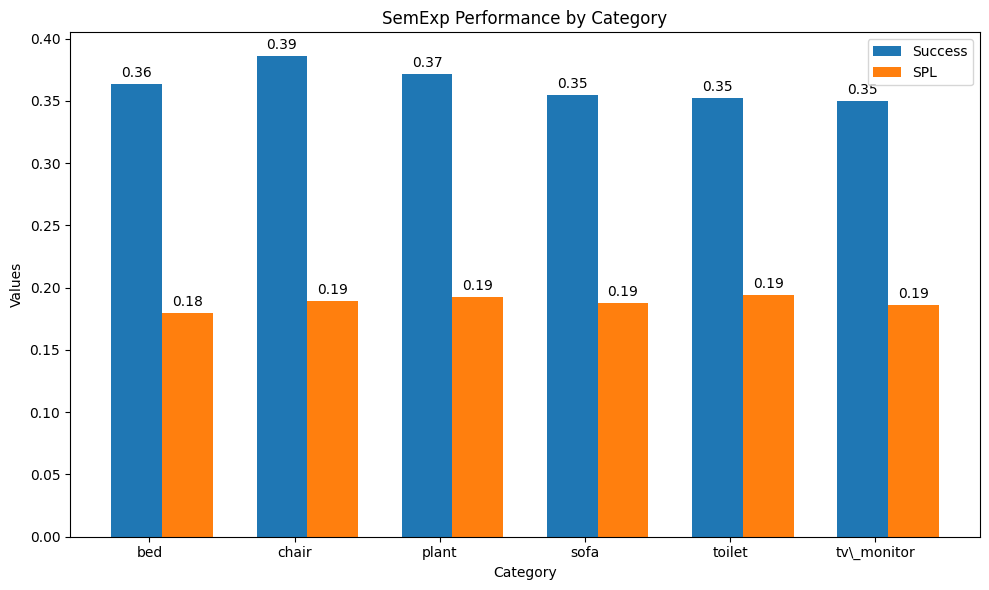

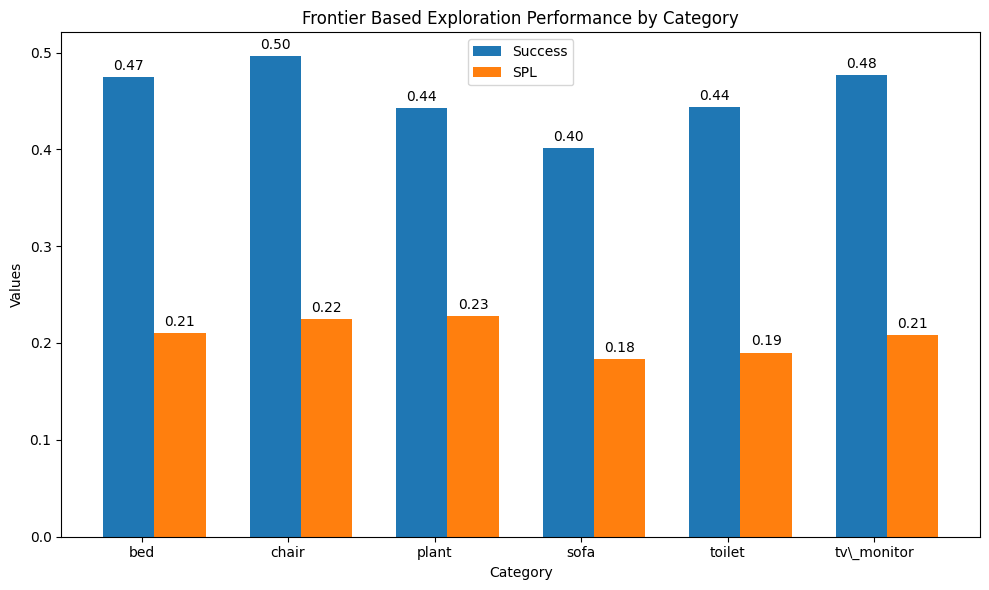

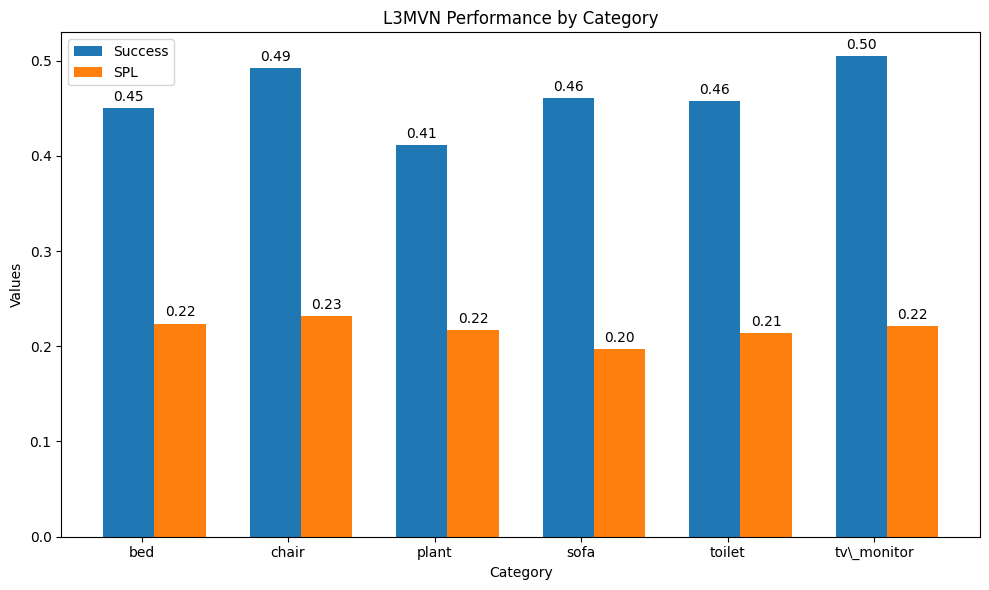

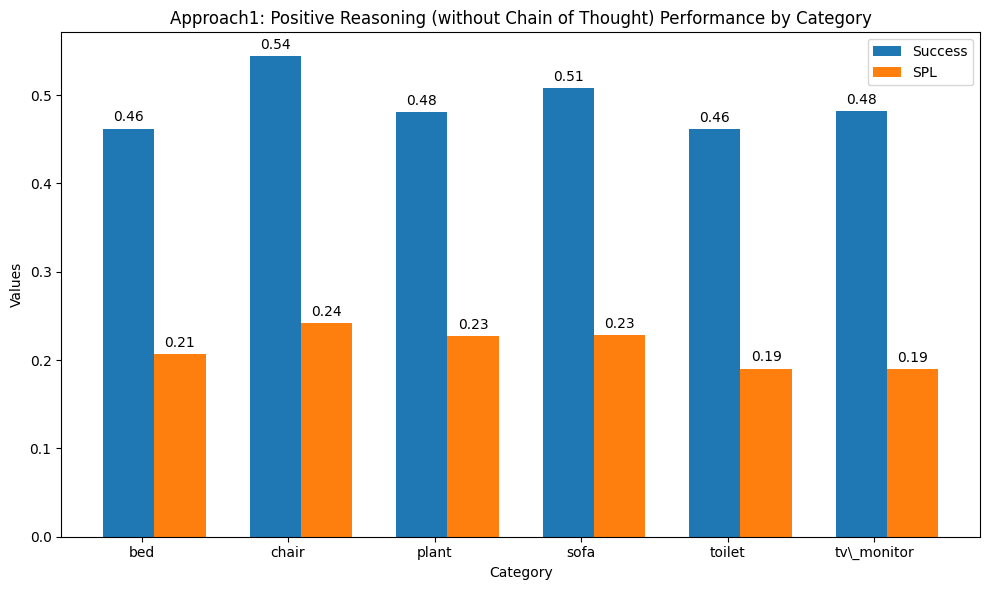

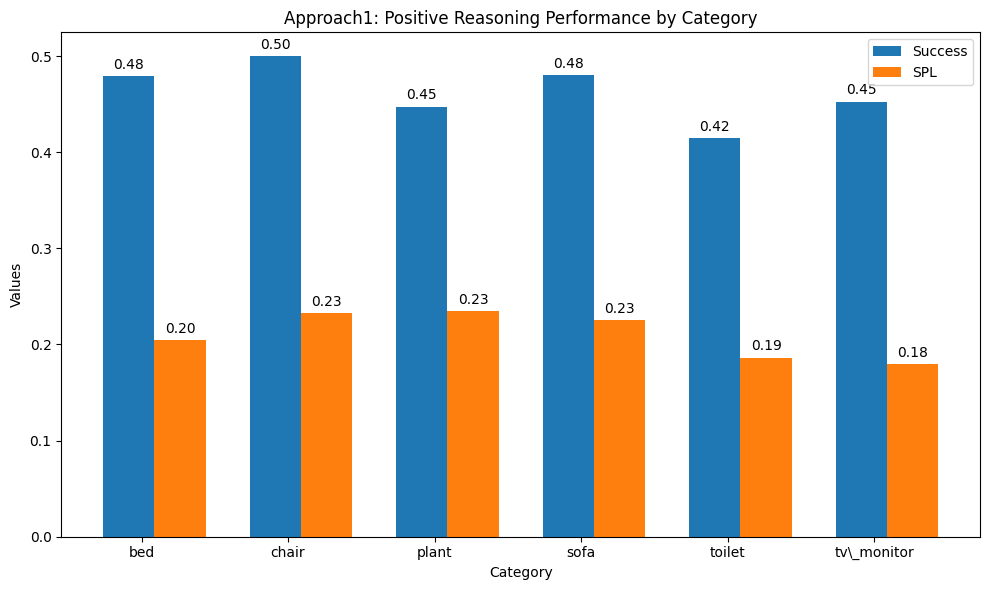

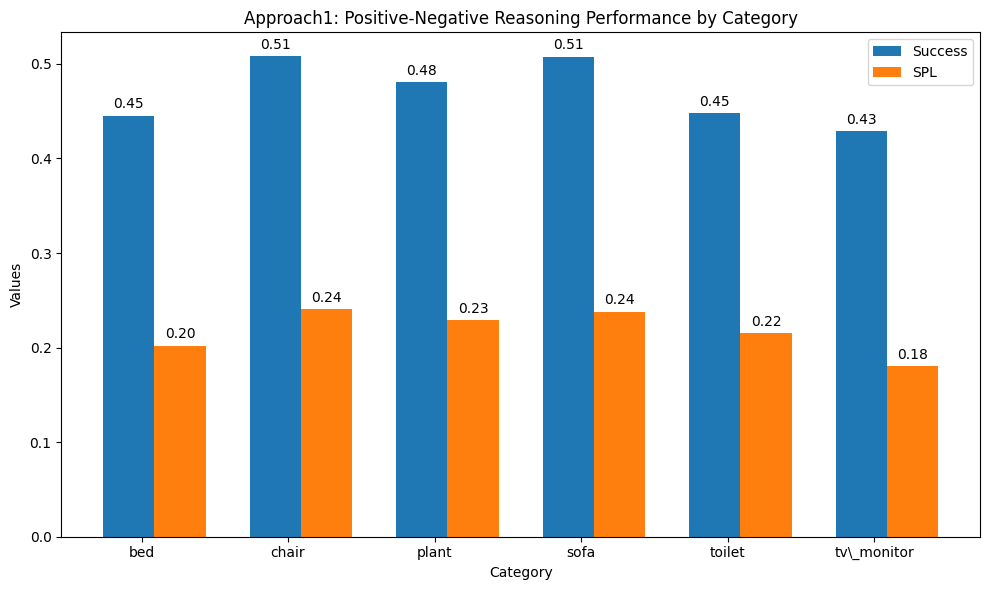

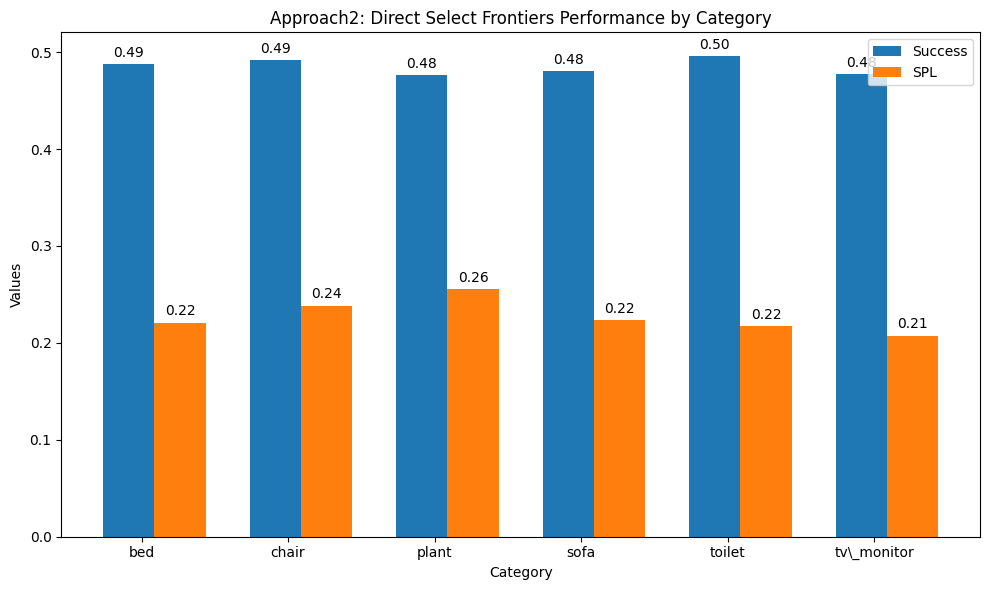

In [11]:
# Unique experiments derived from your data
experiments = df['Experiment'].unique()  # Adjust based on your actual dataframe structure
metrics = ['Success', 'SPL']  # Defining metrics as these are the values you are comparing

# Setting up colors or styles for each metric for visual distinction
# colors = {'Success': 'skyblue', 'SPL': 'lightgreen'}

# Set a wider bar width for clarity in visualization
bar_width = 0.35

for experiment in experiments:
    experiment_data = df[df['Experiment'] == experiment]
    
    categories = experiment_data['Category'].unique()
    categories.sort()  # Sort categories if needed
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    index = np.arange(len(categories))
    
    for i, metric in enumerate(metrics):
        values = [experiment_data[experiment_data['Category'] == cat][metric].values[0] for cat in categories]
        pos = [p + (bar_width * i) for p in index]  # Positioning each bar
        
        bars = ax.bar(pos, values, bar_width, label=metric)
        
        # Adding value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    ax.set_xlabel('Category')
    ax.set_ylabel('Values')
    ax.set_title(f'{experiment} Performance by Category')
    ax.set_xticks(index + bar_width / len(metrics) / 2)  # Centering label under groups of bars
    ax.set_xticklabels(categories)
    ax.legend(loc='best')
    
    plt.xticks(rotation=0)  # Optional: Rotate category labels for clarity
    plt.tight_layout()
    plt.show()

## Main results

In [12]:
legend_dict = {"llm_v4_direct_select_pos_1": "Approach2: Direct Select Frontiers",
               "llm_v3_pos_neg_dst": "Approach1: Positive-Negative Reasoning",
               "fbe_baseline": "Frontier Based Exploration",
               "llm_v2_pos_cot": "Approach1: Positive Reasoning",
               "l3mvn_baseline_local_step_15": "L3MVN",
               "llm_v1_no_cot_local_step_15": "Approach1: Positive Reasoning (without Chain of Thought)",
               "sem_exp_baseline": "SemExp",
               }

## DTS

In [13]:
df = pd.read_csv('dts_bar_plot.csv')

In [14]:
df_sorted = df.sort_values('total_dist', ascending=True)

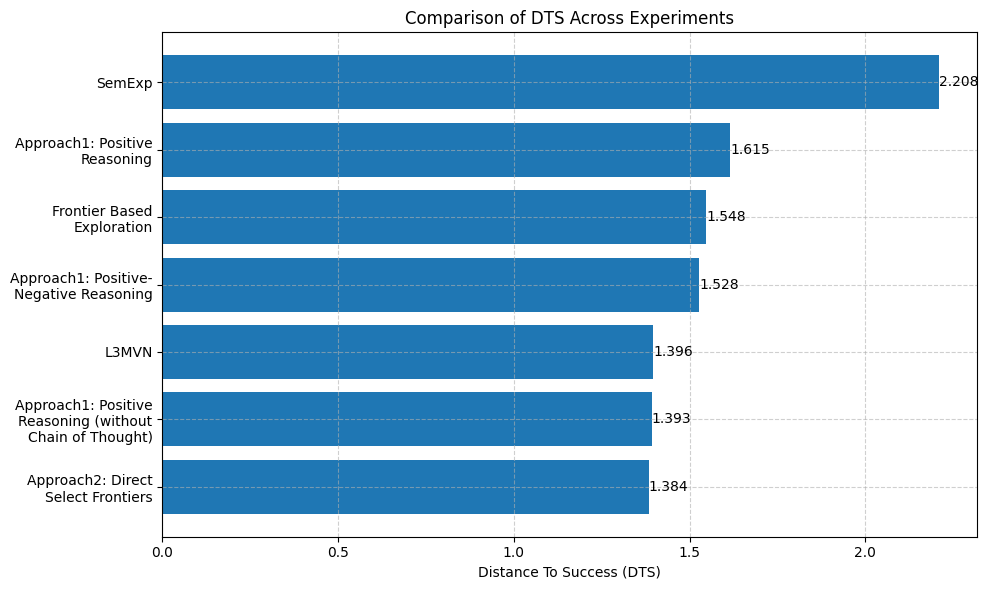

In [15]:
# Replace the names using the mapping
df['Name'] = df['Name'].replace(legend_dict)

# Sort the dataframe by 'total_dist' for better visual representation
df_sorted = df.sort_values(by='total_dist', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted['Name'], df_sorted['total_dist'])
plt.xlabel('Distance To Success (DTS)')
plt.title('Comparison of DTS Across Experiments')
plt.grid(True, linestyle='--', alpha=0.6)

# Wrap text for the y-axis labels
wrapper = textwrap.TextWrapper(width=20)  # Adjust 'width' to fit your plot needs
wrapped_labels = [wrapper.fill(text=name) for name in df_sorted['Name']]
plt.yticks(ticks=plt.yticks()[0], labels=wrapped_labels)

# Adding text labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.3f}',  # Formatting to two decimal places
             va='center')  # Vertical alignment

plt.tight_layout()
plt.show()


In [16]:
# Generate LaTeX table code
df_filtered = df_sorted.drop(columns=['_wandb'])
latex_table = df_filtered.to_latex(index=False, header=True, column_format='lp{6cm}r', escape=True,
                                 float_format="{:0.4f}".format,
                                 caption='Comparison of Distance to Success (DTS) Across Experiments',
                                 label='tab:dts_comparison',
                                 position='htbp')

print(latex_table)

\begin{table}[htbp]
\caption{Comparison of Distance to Success (DTS) Across Experiments}
\label{tab:dts_comparison}
\begin{tabular}{lp{6cm}r}
\toprule
Name & total\_dist \\
\midrule
Approach2: Direct Select Frontiers & 1.3837 \\
Approach1: Positive Reasoning (without Chain of Thought) & 1.3925 \\
L3MVN & 1.3962 \\
Approach1: Positive-Negative Reasoning & 1.5281 \\
Frontier Based Exploration & 1.5478 \\
Approach1: Positive Reasoning & 1.6149 \\
SemExp & 2.2082 \\
\bottomrule
\end{tabular}
\end{table}



In [17]:
df = pd.read_csv('dts_trend_data.csv')

In [18]:
# df.columns

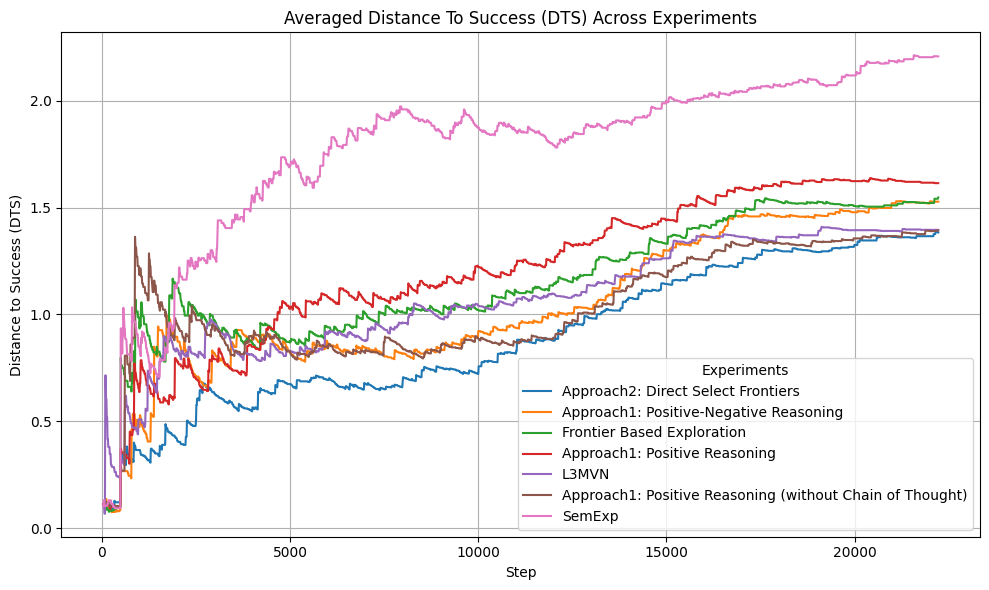

In [19]:
# Filter columns that contain only 'total_dist' and exclude '__MIN' and '__MAX'
total_dist_columns = [col for col in df.columns if 'total_dist' in col and '__' not in col]

# Create a filtered DataFrame with only the main 'total_dist' columns
df_total_dist = df[['Step'] + total_dist_columns]

# Plot the averaged data for total_dist
plt.figure(figsize=(10, 6))
for col in total_dist_columns:
    # Extract the base experiment name
    base_name = col.split(' - ')[0]
    # Use the dictionary to get the friendly name for the legend
    friendly_name = legend_dict.get(base_name, base_name)  # Default to base_name if not found
    plt.plot(df_total_dist['Step'], df_total_dist[col], label=friendly_name)

# Add labels, title, and legend
plt.xlabel('Step')
plt.ylabel('Distance to Success (DTS)')
plt.title('Averaged Distance To Success (DTS) Across Experiments')
plt.legend(title='Experiments', loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## SR

In [20]:
df = pd.read_csv('sr_bar_plot_data.csv')

In [21]:
df.columns

Index(['Name', '_wandb', 'total_success'], dtype='object')

In [22]:
df_sorted = df.sort_values('total_success', ascending=True)

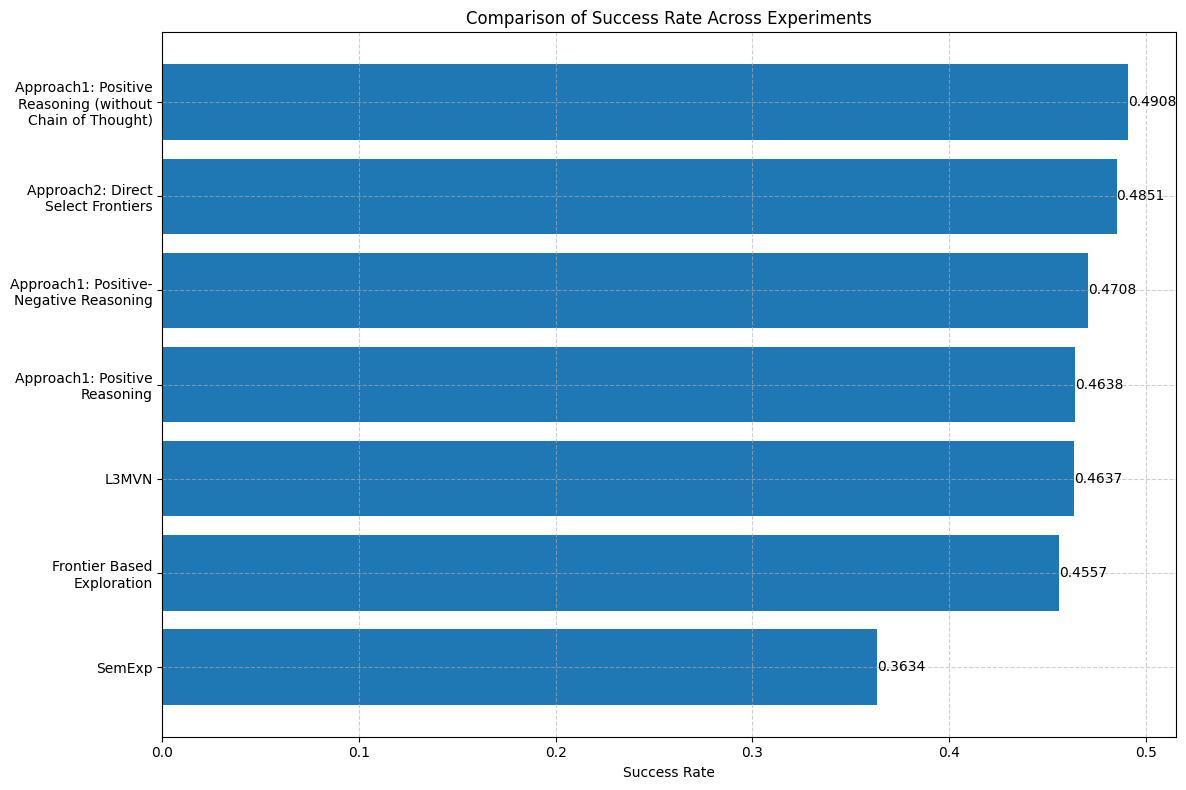

In [23]:

# Replace the names using the mapping
df['Name'] = df['Name'].replace(legend_dict)

# Sort values for better visual representation
df_sorted = df.sort_values(by='total_success', ascending=True)

# Wrap text for the y-axis labels using textwrap
wrapper = textwrap.TextWrapper(width=30)  # Adjust width to your preference
df_sorted['Name'] = df_sorted['Name'].apply(lambda x: wrapper.fill(text=x))

# Plotting
plt.figure(figsize=(12, 8))  # Increased figure size for better display
bars = plt.barh(df_sorted['Name'], df_sorted['total_success'])
plt.xlabel('Success Rate')
plt.title('Comparison of Success Rate Across Experiments')
plt.grid(True, linestyle='--', alpha=0.6)

# Wrap text for the y-axis labels
wrapper = textwrap.TextWrapper(width=20)  # Adjust 'width' as necessary
wrapped_labels = [wrapper.fill(text=label) for label in df_sorted['Name']]
plt.yticks(ticks=plt.yticks()[0], labels=wrapped_labels)

# Adding text labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.4f}',  # Formatting to two decimal places
             va='center')  # Vertical alignment

plt.tight_layout()
plt.show()


In [24]:
df['Name'] = df['Name'].replace(legend_dict)

# Sort the dataframe by 'total_success' for better visual representation
df_sorted = df.sort_values(by='total_success', ascending=False)

df_filtered = df_sorted.drop(columns=['_wandb'])
latex_table = df_filtered.to_latex(index=False, header=True, column_format='lp{4cm}r', escape=True,
                                 caption='Comparison of Success Rate Across Experiments',
                                 label='tab:success_rate',
                                 position='htbp', float_format="{:0.4f}".format)

print(latex_table)

\begin{table}[htbp]
\caption{Comparison of Success Rate Across Experiments}
\label{tab:success_rate}
\begin{tabular}{lp{4cm}r}
\toprule
Name & total\_success \\
\midrule
Approach1: Positive Reasoning (without Chain of Thought) & 0.4908 \\
Approach2: Direct Select Frontiers & 0.4851 \\
Approach1: Positive-Negative Reasoning & 0.4708 \\
Approach1: Positive Reasoning & 0.4638 \\
L3MVN & 0.4637 \\
Frontier Based Exploration & 0.4557 \\
SemExp & 0.3634 \\
\bottomrule
\end{tabular}
\end{table}



In [25]:
df = pd.read_csv('sr_trend_data.csv')

In [26]:
# df.columns

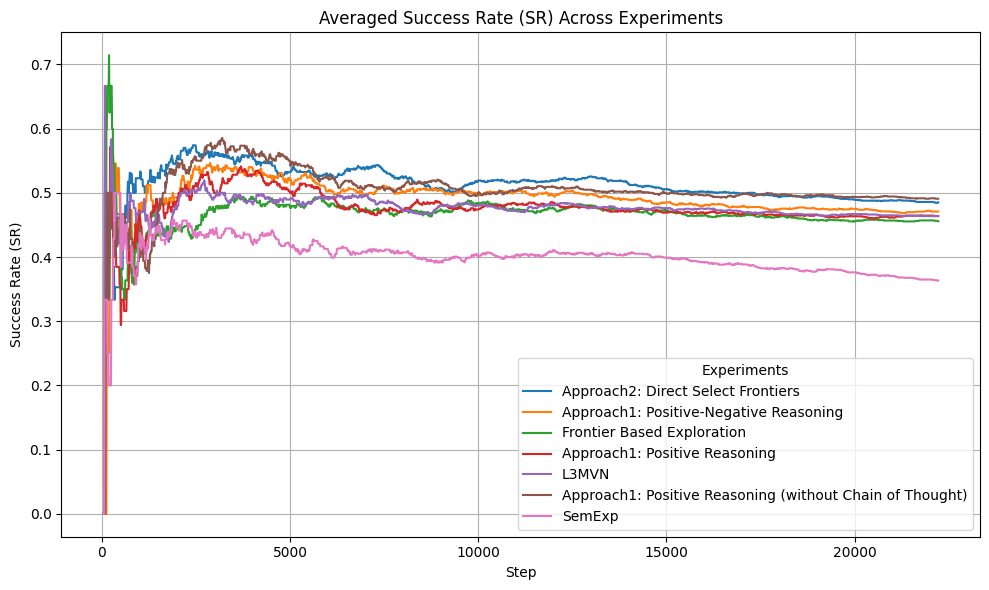

In [27]:
total_success_columns = [col for col in df.columns if 'total_success' in col and '__' not in col]

# Create a filtered DataFrame with only the main 'total_success' columns
df_total_success = df[['Step'] + total_success_columns]

# Plot the averaged data for total_success
plt.figure(figsize=(10, 6))
for col in total_success_columns:
    # Extract the base experiment name
    base_name = col.split(' - ')[0]
    # Use the dictionary to get the friendly name for the legend
    friendly_name = legend_dict.get(base_name, base_name)  # Default to base_name if not found
    plt.plot(df_total_success['Step'], df_total_success[col], label=friendly_name)

# Add labels, title, and legend
plt.xlabel('Step')
plt.ylabel('Success Rate (SR)')
plt.title('Averaged Success Rate (SR) Across Experiments')
plt.legend(title='Experiments', loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## SPL

In [28]:
df = pd.read_csv('spl_bar.csv')

In [29]:
df.columns

Index(['Name', '_wandb', 'total_spl'], dtype='object')

In [30]:
df['Name'] = df['Name'].replace(legend_dict)

# Sort the DataFrame by 'total_spl' for better visual representation
df_sorted = df.sort_values(by='total_spl', ascending=False)

# Drop the '_wandb' column as it's not needed for the LaTeX table
df_filtered = df_sorted.drop(columns=['_wandb'])

# Generate LaTeX table code
latex_table = df_filtered.to_latex(index=False, header=True, column_format='lp{4cm}r', escape=True,
                                 caption='Comparison of SPL Across Experiments',
                                 label='tab:spl_comparison',
                                 position='htbp', float_format="{:0.3f}".format)

print(latex_table)

\begin{table}[htbp]
\caption{Comparison of SPL Across Experiments}
\label{tab:spl_comparison}
\begin{tabular}{lp{4cm}r}
\toprule
Name & total\_spl \\
\midrule
Approach2: Direct Select Frontiers & 0.227 \\
Approach1: Positive-Negative Reasoning & 0.218 \\
L3MVN & 0.217 \\
Approach1: Positive Reasoning (without Chain of Thought) & 0.215 \\
Approach1: Positive Reasoning & 0.211 \\
Frontier Based Exploration & 0.207 \\
SemExp & 0.188 \\
\bottomrule
\end{tabular}
\end{table}



In [31]:
df = pd.read_csv('spl_trend.csv')

In [32]:
df.columns

Index(['Step', 'llm_v4_direct_select_pos_1 - total_spl',
       'llm_v4_direct_select_pos_1 - total_spl__MIN',
       'llm_v4_direct_select_pos_1 - total_spl__MAX',
       'llm_v3_pos_neg_dst - total_spl', 'llm_v3_pos_neg_dst - total_spl__MIN',
       'llm_v3_pos_neg_dst - total_spl__MAX', 'fbe_baseline - total_spl',
       'fbe_baseline - total_spl__MIN', 'fbe_baseline - total_spl__MAX',
       'llm_v2_pos_cot - total_spl', 'llm_v2_pos_cot - total_spl__MIN',
       'llm_v2_pos_cot - total_spl__MAX',
       'l3mvn_baseline_local_step_15 - total_spl',
       'l3mvn_baseline_local_step_15 - total_spl__MIN',
       'l3mvn_baseline_local_step_15 - total_spl__MAX',
       'llm_v1_no_cot_local_step_15 - total_spl',
       'llm_v1_no_cot_local_step_15 - total_spl__MIN',
       'llm_v1_no_cot_local_step_15 - total_spl__MAX',
       'sem_exp_baseline - total_spl', 'sem_exp_baseline - total_spl__MIN',
       'sem_exp_baseline - total_spl__MAX'],
      dtype='object')

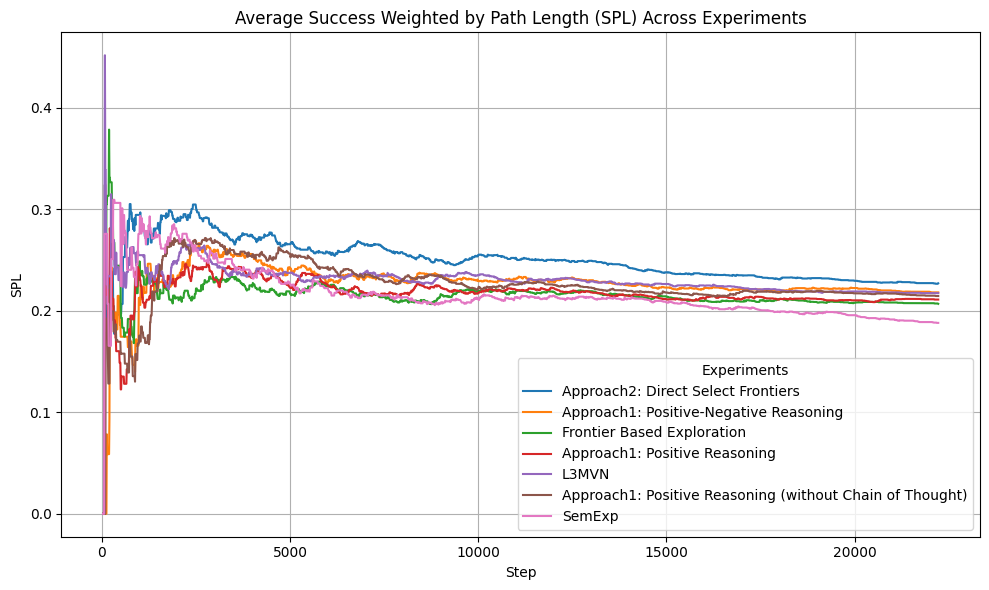

In [33]:
total_spl_columns = [col for col in df.columns if 'total_spl' in col and '__' not in col]

# Create a filtered DataFrame with only the main 'total_spl' columns
df_total_spl = df[['Step'] + total_spl_columns]

# Plotting the averaged data for total_spl
plt.figure(figsize=(10, 6))
for col in total_spl_columns:
    # Extract the base experiment name
    base_name = col.split(' - ')[0]
    # Use the dictionary to get the friendly name for the legend
    friendly_name = legend_dict.get(base_name, base_name)  # Default to base_name if not found
    plt.plot(df_total_spl['Step'], df_total_spl[col], label=friendly_name)

# Add labels, title, and legend
plt.xlabel('Step')
plt.ylabel('SPL')
plt.title('Average Success Weighted by Path Length (SPL) Across Experiments')
plt.legend(title='Experiments', loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()